In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy import spatial
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_image(img):
    
    # reads image into gray scale
    image = Image.open(img).convert("L")
    
    img_mat = np.asarray(image)
    
    #convert to ts
    new_image = pd.Series(img_mat.flatten())
    
    plt.imshow(image, cmap='gray')
    plt.show()
    
    height,width = img_mat.shape[:2]
     
    return (new_image, height,width, img_mat, image)

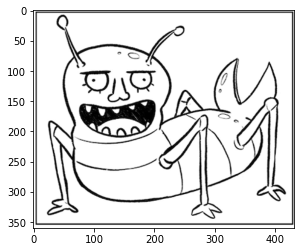

Bug image is 432 x 360


In [3]:
bug_image = read_image('Bug Final.png')
bug_new_image , bug_height , bug_width = bug_image[0:3]
print('Bug image is {} x {}'.format(bug_width , bug_height )) 

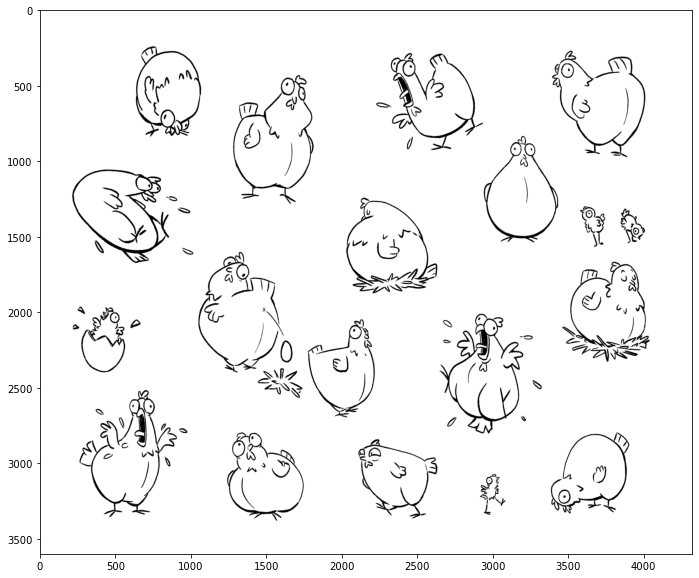

Chicken image is 4320 x 3600


In [4]:
fig = plt.figure(figsize=(20, 10))
chicken_image = read_image('chickens clean.png')
c_height , c_width = chicken_image[1:3]
print('Chicken image is {} x {}'.format(c_width , c_height)) 

In [7]:
chickens_img = chicken_image[4]
bug_img  =bug_image[4]

In [8]:
# takes the bug image and places it in the chicken image
def bug_placement(chickens_img, bug_img, x, y, img):
   
    c_h = chickens_img.copy()
    c_h.paste(bug_img,(x,y)) # paste the bug in the position of x and y 
     
    c_h.save(img,quality=95) #save the new image with the bug in it 
    
    # use our read image function to get the ts, width and height of the new img 
    img_1 = read_image(img)
    return img_1

In [9]:
def find_cord(img, bug):
    
    bug_arr = bug[3]
    arr = img[3]
    height, widht = img[1:3]
    bug_h, bug_w = bug[1:3]
    
    c_dis = float('inf')
    
    for i in range(0, height - bug_h):
        for j in range(0,widht - bug_w):
            patch = arr[i:bug_h+i, j:bug_w+j]
            #exit if we find the bug
            if (np.array_equal(bug_arr, patch)):
                bug_patch = patch
                bug_y , bug_x = i,j
                c_dis = 1
                return (bug_patch, bug_x , bug_y , c_dis)
                    
    return (bug_patch, bug_x , bug_y , c_dis)

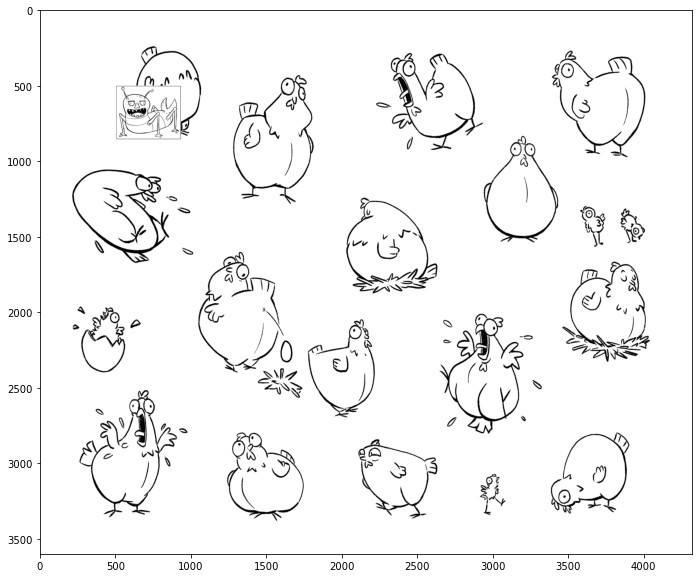

Original Coordinates 500 x 500
Bug is in 500 x 500


In [10]:
# Experiment 1
fig = plt.figure(figsize=(20, 10))
m1 = bug_placement(chickens_img,bug_img,500,500,'m1.png')
m1_height , m1_width = m1[1:3]
print('Original Coordinates {} x {}'.format(500,500)) 

bug_patch, bug_x , bug_y , c_dis = find_cord(m1, bug_image)
print('Bug is in {} x {}'.format( bug_x ,bug_y))

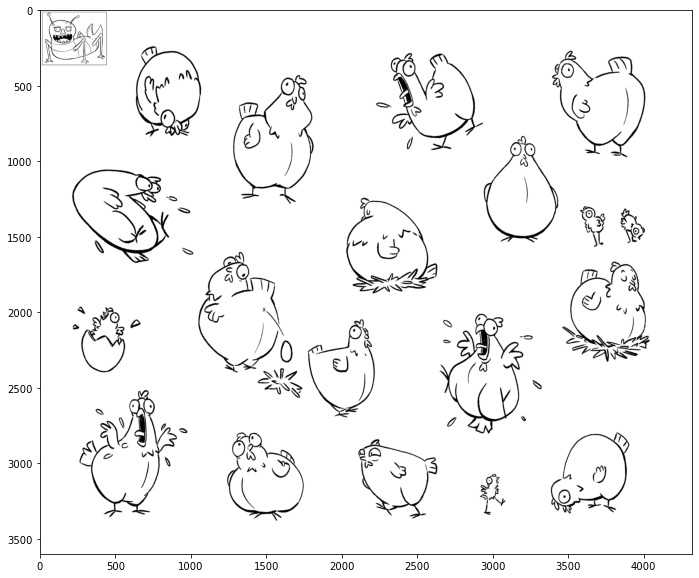

Original Coordinates 10 x 10
Bug is in 10 x 10


In [11]:
# Experiment 2
fig = plt.figure(figsize=(20, 10))
m1 = bug_placement(chickens_img,bug_img,10,10,'m1.png')
m1_height , m1_width = m1[1:3]
print('Original Coordinates {} x {}'.format(10,10)) 

bug_patch, bug_x , bug_y , c_dis = find_cord(m1, bug_image)
print('Bug is in {} x {}'.format( bug_x ,bug_y))

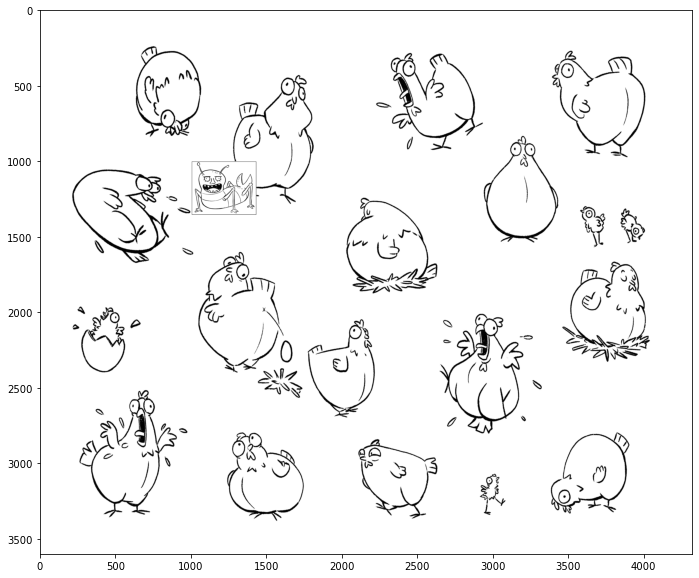

Original Coordinates 1000 x 1000
Bug is in 1000 x 1000


In [12]:
# Experiment 3
fig = plt.figure(figsize=(20, 10))
m1 = bug_placement(chickens_img,bug_img,1000,1000,'m1.png')
m1_height , m1_width = m1[1:3]
print('Original Coordinates {} x {}'.format(1000,1000)) 

bug_patch, bug_x , bug_y , c_dis = find_cord(m1, bug_image)
print('Bug is in {} x {}'.format( bug_x ,bug_y))